# Maternal Health Risk using machine learning:

Maternal health risk assessment using machine learning involves the
development of predictive models that leverage patient data to identify and
manage risks associated with pregnancy and childbirth. These models have the
potential to enhance maternal healthcare by enabling early interventions and
improving overall outcomes for both mothers and infants.
The primary objective is to use machine learning to improve the quality of care
provided to expectant mothers, reduce maternal mortality and morbidity rates,
and enhance the overall experience and outcomes of pregnancy and childbirth.
It's crucial to ensure that the model is developed and deployed with a focus on
patient privacy, ethics, and adherence to healthcare regulations.


Dataset in this model is all about the ages with their
systolicBP,DiastolicBP,BS,BodyTemp,Heart rate,Risk level

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [58]:
# Please upload your file to Colab and replace the placeholder path with the correct path after uploading.
# You can upload files by clicking on the folder icon in the left sidebar, then right-clicking on the uploaded file and selecting "Copy path".
df = pd.read_csv("/content/maternal_health_risk.csv")
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [59]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [60]:
df.dtypes


,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [61]:
df.shape


(1014, 7)

In [62]:
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [63]:
data_dup = df.duplicated().any()
data_dup

np.True_

In [64]:
df = df.drop_duplicates()


In [65]:
data_dup = df.duplicated().any()
data_dup

np.False_

In [66]:
ca_val=[]
co_val=[]
for column in df.columns:
    if df[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [67]:
ca_val


['BodyTemp', 'RiskLevel']

In [68]:
df['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [69]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [70]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [71]:
df['Age'].unique()


array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [72]:
df['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [73]:
df['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [74]:
df['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [75]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [76]:
RiskLevel = {'low risk':1,
'mid risk':2,
'high risk':3}
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [77]:
df['RiskLevel'].value_counts()


,count
RiskLevel,
1.0,234
3.0,112
2.0,106


In [78]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


In [79]:
df[['RiskLevel','Age']].corr()


,RiskLevel,Age
RiskLevel,1.00000,0.18301
Age,0.18301,1.00000


In [80]:
df[['RiskLevel','SystolicBP']].corr()

,RiskLevel,SystolicBP
RiskLevel,1.000000,0.327365
SystolicBP,0.327365,1.000000


In [81]:
df[['RiskLevel','DiastolicBP']].corr()


,RiskLevel,DiastolicBP
RiskLevel,1.000000,0.254239
DiastolicBP,0.254239,1.000000


In [82]:
df[['RiskLevel','BS']].corr()


,RiskLevel,BS
RiskLevel,1.000000,0.548888
BS,0.548888,1.000000


In [83]:
df[['RiskLevel','HeartRate']].corr()


,RiskLevel,HeartRate
RiskLevel,1.000000,0.183289
HeartRate,0.183289,1.000000


In [84]:
import matplotlib.pyplot as plt
import pandas as pd
# Load your data into a Pandas DataFrame
df = pd.read_csv('/content/maternal_health_risk.csv')

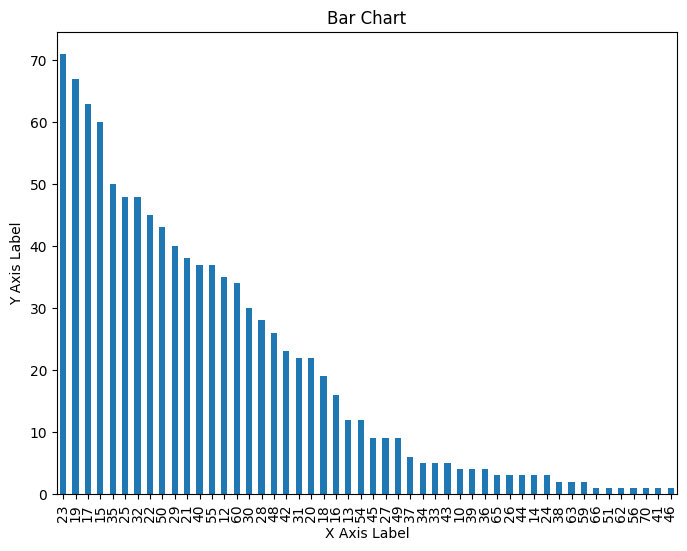

In [85]:
 plt.figure(figsize=(8, 6))
df['Age'].value_counts().plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()

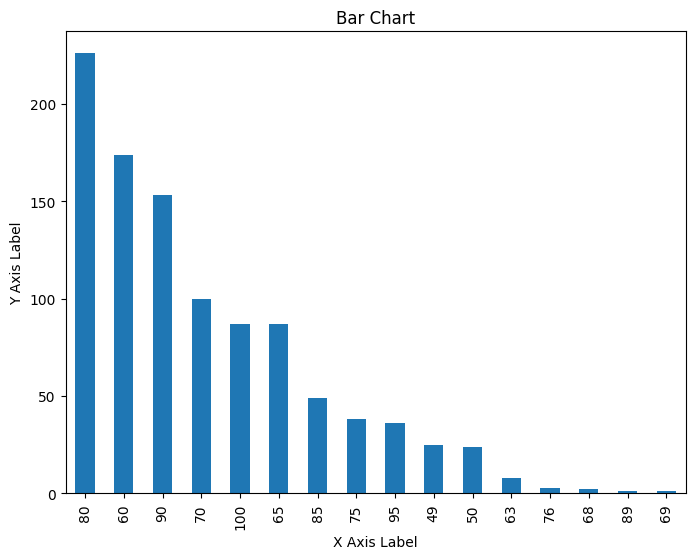

In [86]:
plt.figure(figsize=(8, 6))
df['DiastolicBP'].value_counts().plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()

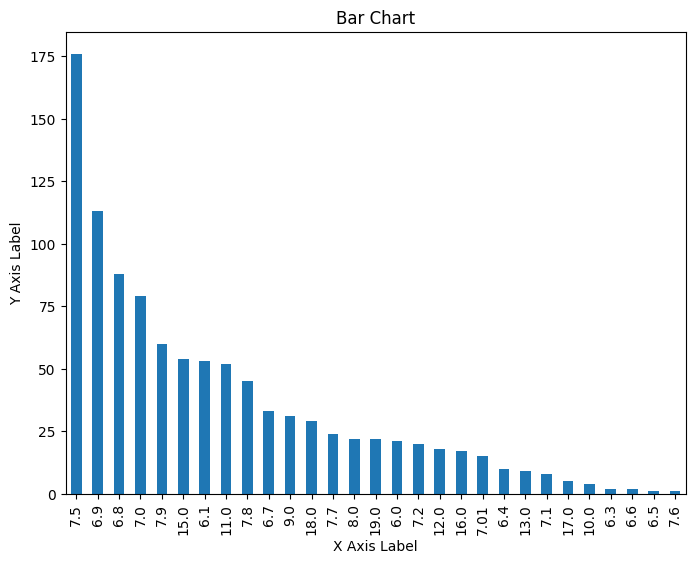

In [87]:
plt.figure(figsize=(8, 6))
df['BS'].value_counts().plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()

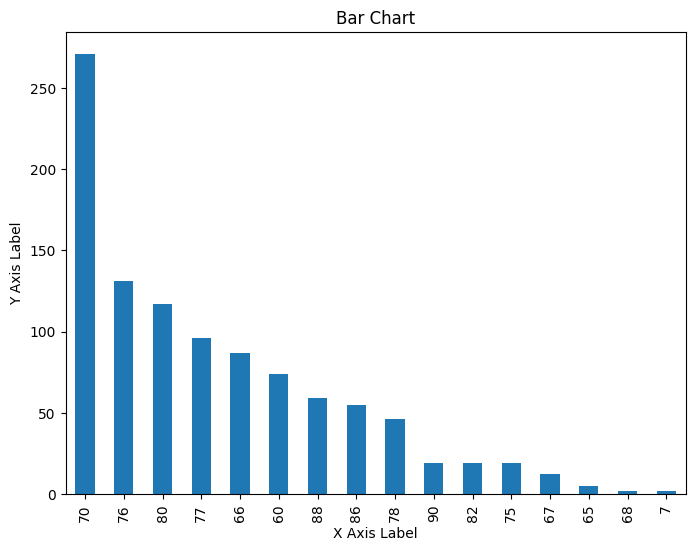

In [88]:
plt.figure(figsize=(8, 6))
df['HeartRate'].value_counts().plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()

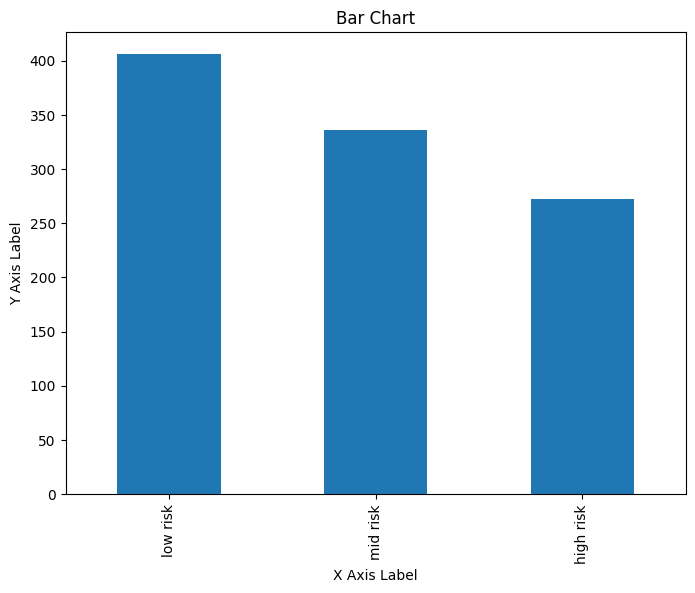

In [89]:
plt.figure(figsize=(8, 6))
df['RiskLevel'].value_counts().plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()

In [90]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


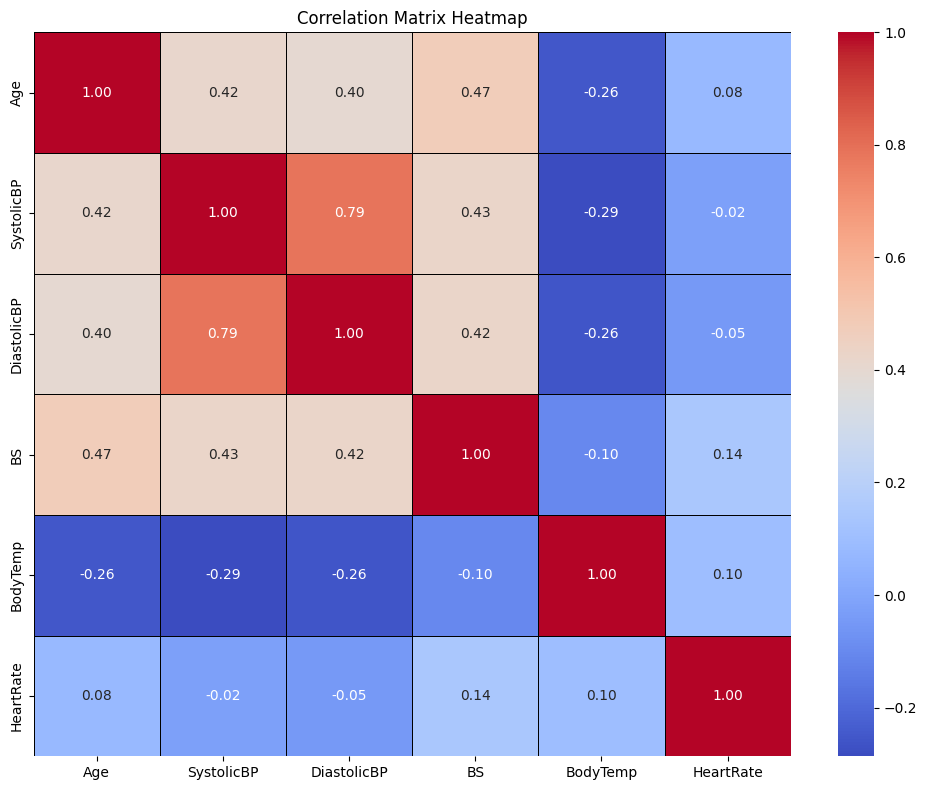

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/maternal_health_risk.csv')
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

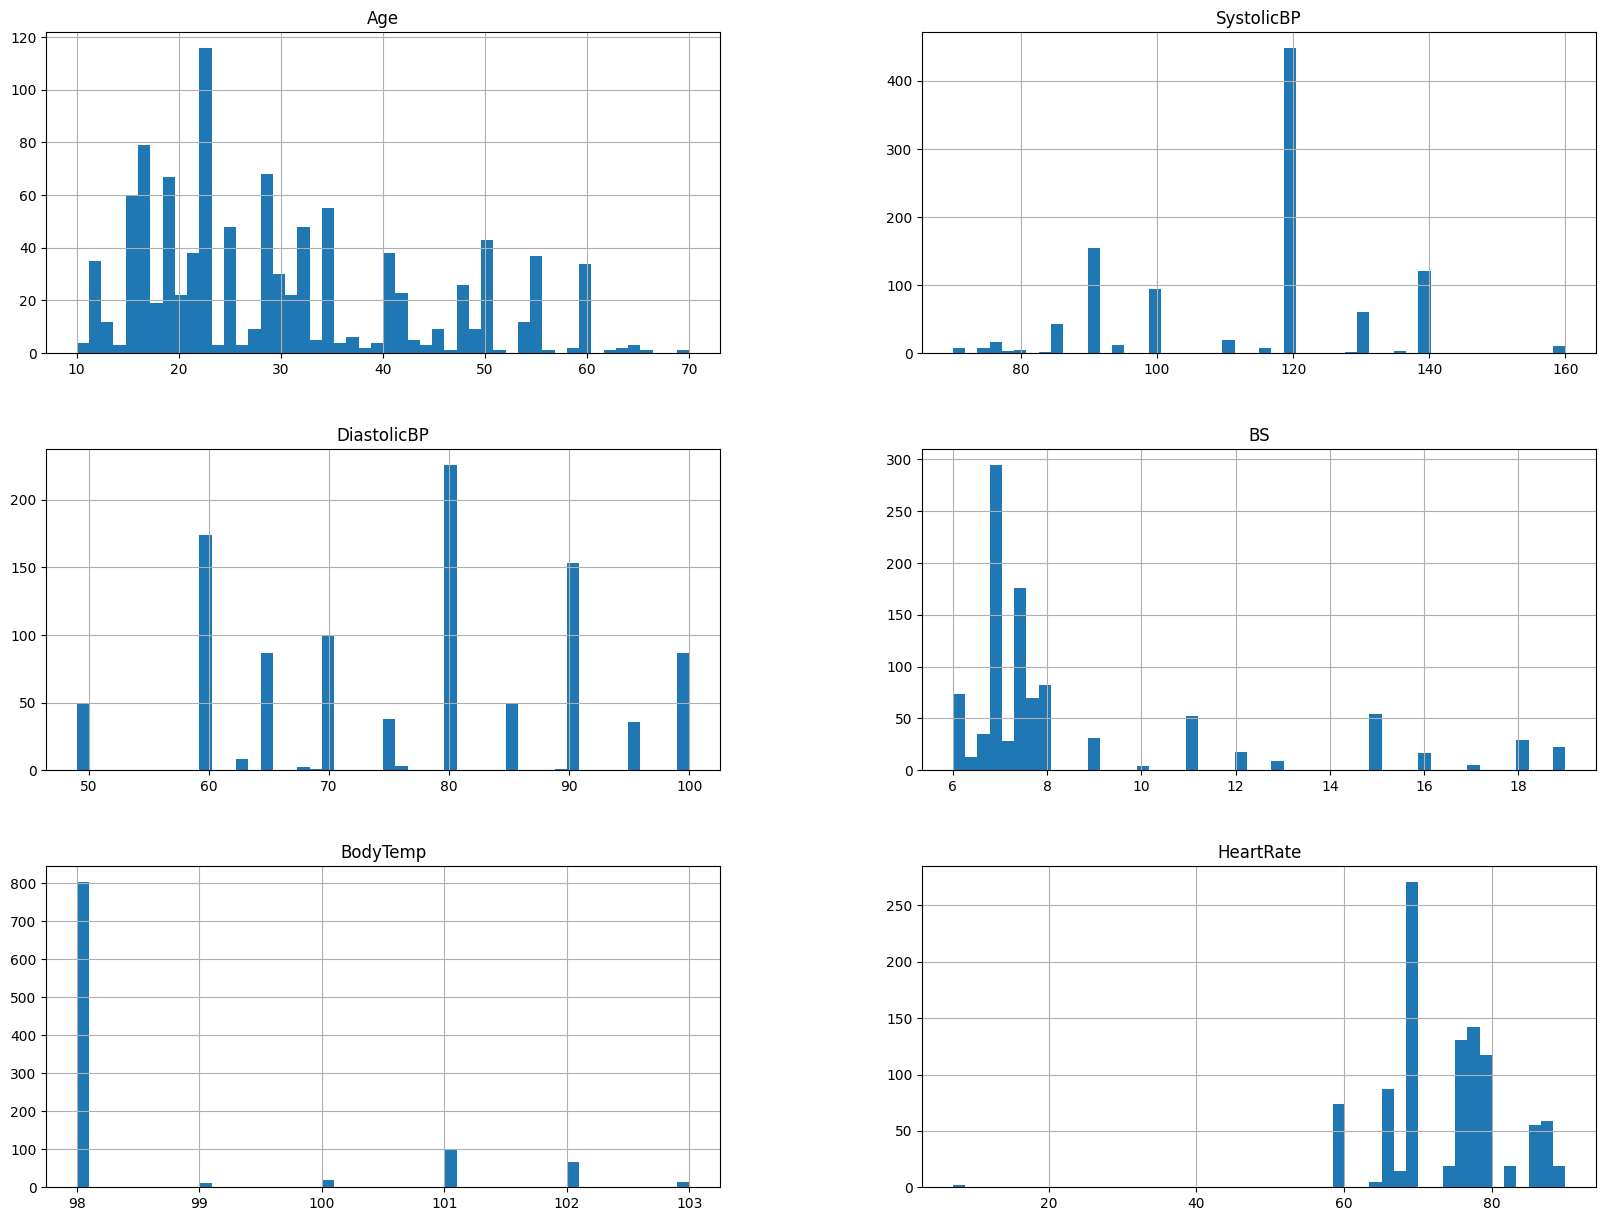

In [92]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

/tmp/ipython-input-1640055598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskLevel', data=df, palette='viridis')


<Axes: xlabel='RiskLevel', ylabel='count'>

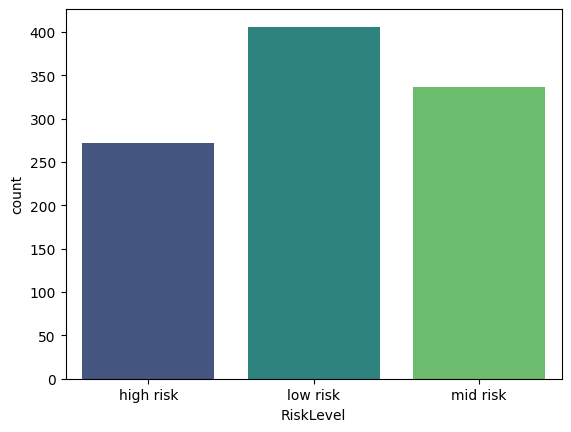

In [93]:
df['RiskLevel'].value_counts()
df['RiskLevel'].value_counts() * 100 / len(df)
sns.countplot(x='RiskLevel', data=df, palette='viridis')

In [94]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [95]:
y

,RiskLevel
0,high risk
1,high risk
2,high risk
3,high risk
4,low risk
...,...
1009,high risk
1010,high risk
1011,high risk
1012,high risk


In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
random_state=42)
y_test

,RiskLevel
752,mid risk
519,high risk
210,high risk
611,low risk
914,low risk
...,...
1003,high risk
227,high risk
868,mid risk
584,high risk


In [97]:
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',X.shape)
print(f'Testing Shape y:',y.shape)


Training Shape x: (709, 6)
Testing Shape x: (305, 6)
*****___________*****___________*****
Training Shape y: (1014, 6)
Testing Shape y: (1014,)


In [98]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
print("Train accuracy:",svm.score(X_train,y_train))
print("Test accuracy:",svm.score(X_test,y_test))
y_pred = svm.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, svm.predict(X_test)))

Train accuracy: 0.846262341325811
Test accuracy: 0.7180327868852459
['mid risk' 'high risk' 'high risk' 'low risk' 'mid risk' 'mid risk'
 'mid risk' 'mid risk' 'mid risk' 'high risk' 'high risk' 'low risk'
 'low risk' 'high risk' 'mid risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'mid risk' 'mid risk' 'mid risk' 'mid risk' 'high risk'
 'low risk' 'mid risk' 'high risk' 'mid risk' 'low risk' 'low risk'
 'mid risk' 'high risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'high risk' 'mid risk' 'low risk' 'high risk' 'low risk' 'mid risk'
 'high risk' 'high risk' 'low risk' 'mid risk' 'high risk' 'mid risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'mid risk' 'mid risk' 'high risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'mid risk' 'mid risk' 'mid risk' 'mid risk' 'high risk'
 'mid risk' 'high risk' 'mid risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'mid risk' 'low risk' 'high risk' 'low risk' 'mid risk'
 'high risk' 'low risk' 'low risk' 'low r

In [99]:
from sklearn.ensemble import RandomForestClassifier
#Create Random Forest object
random_forest = RandomForestClassifier()
#Train model
random_forest.fit(X_train, y_train)
print("Train accuracy:",random_forest.score(X_train,y_train))
print("Test accuracy:",random_forest.score(X_test,y_test))
y_pred = random_forest.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, random_forest.predict(X_test)))

Train accuracy: 0.9464033850493653
Test accuracy: 0.8
['mid risk' 'high risk' 'high risk' 'low risk' 'low risk' 'mid risk'
 'mid risk' 'mid risk' 'mid risk' 'low risk' 'high risk' 'mid risk'
 'mid risk' 'high risk' 'mid risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'mid risk' 'mid risk' 'mid risk' 'high risk' 'high risk'
 'low risk' 'mid risk' 'high risk' 'mid risk' 'low risk' 'low risk'
 'mid risk' 'high risk' 'low risk' 'mid risk' 'high risk' 'high risk'
 'high risk' 'mid risk' 'low risk' 'high risk' 'high risk' 'low risk'
 'high risk' 'high risk' 'low risk' 'mid risk' 'high risk' 'mid risk'
 'low risk' 'low risk' 'mid risk' 'low risk' 'low risk' 'mid risk'
 'mid risk' 'mid risk' 'high risk' 'low risk' 'low risk' 'mid risk'
 'low risk' 'mid risk' 'mid risk' 'mid risk' 'low risk' 'high risk'
 'mid risk' 'high risk' 'mid risk' 'high risk' 'high risk' 'high risk'
 'mid risk' 'mid risk' 'mid risk' 'high risk' 'low risk' 'mid risk'
 'high risk' 'low risk' 'low risk' 'mid risk' 'low 

In [100]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train , y_train)
print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))
y_pred = nb.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')
print(classification_report(y_test, nb.predict(X_test)))

Train accuracy: 0.61212976022567
Test accuracy: 0.5639344262295082
['low risk' 'high risk' 'high risk' 'low risk' 'mid risk' 'mid risk'
 'low risk' 'mid risk' 'low risk' 'low risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'mid risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'low risk' 'low risk' 'high risk' 'low risk' 'low risk' 'low risk'
 'mid risk' 'high risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'high risk' 'high risk' 'mid risk'
 'high risk' 'low risk' 'low risk' 'mid risk' 'high risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'mid risk' 'low risk' 'low risk' 'low risk' 'low risk'
 'low risk' 'low risk' 'low risk' 'low risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'mid risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'high risk' 'low risk' 'high risk'
 'high risk' 'low risk' 'low risk' 'low risk